# Alter Load

This notebook shows how to use the model `Alter` to change the load at predefined time.

In [1]:
import andes

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=20)

In [4]:
ss = andes.load(andes.get_case('ieee14/ieee14_full.xlsx'),
                setup=False, no_output=True, default_config=True)

Working directory: "/Users/jinningwang/work/demo/demo"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Parsing input file "/Users/jinningwang/work/andes/andes/cases/ieee14/ieee14_full.xlsx"...
Input file parsed in 0.2713 seconds.


In [5]:
ss.add(model='Alter', param_dict=dict(t=3.456, model='PQ', dev='PQ_1', src='Ppf',
                                      attr='v', method='+', amount=0.1))
ss.add(model='Alter', param_dict=dict(t=5.678, model='PQ', dev='PQ_1', src='Ppf',
                                      attr='v', method='-', amount=0.1))

'Alter_2'

In [6]:
ss.setup()

System internal structure set up in 0.0203 seconds.


True

In [7]:
ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0

ss.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0135 seconds.
0: |F(x)| = 0.5605182134
1: |F(x)| = 0.006202200332
2: |F(x)| = 5.819382825e-06
3: |F(x)| = 6.964193111e-12
Converged in 4 iterations in 0.0057 seconds.


True

In [8]:
ss.TDS.run()

Initialization for dynamics completed in 0.0208 seconds.
Initialization was successful.


  0%|          | 0/100 [00:00<?, ?%/s]

<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.317 at t=3.456. Previous value was 0.217.
<Alter Alter_2>: set PQ.PQ_1.Ppf.v=0.217 at t=5.678. Previous value was 0.317.


Simulation to t=20.00 sec completed in 0.5156 seconds.


True

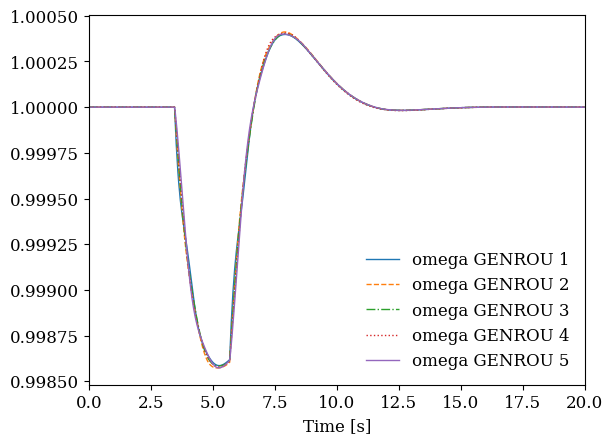

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [9]:
ss.TDS.plt.plot(ss.GENROU.omega, latex=False)

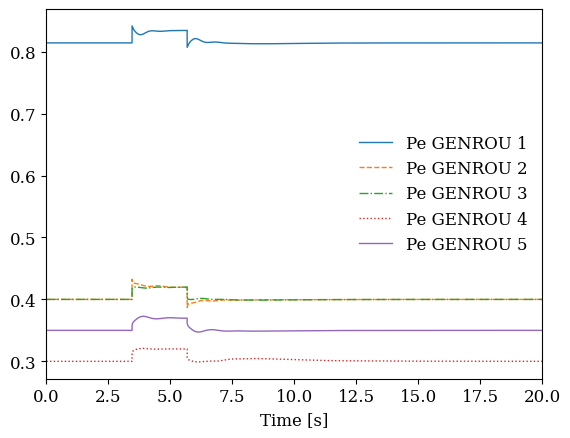

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [10]:
ss.TDS.plt.plot(ss.GENROU.Pe, latex=False)

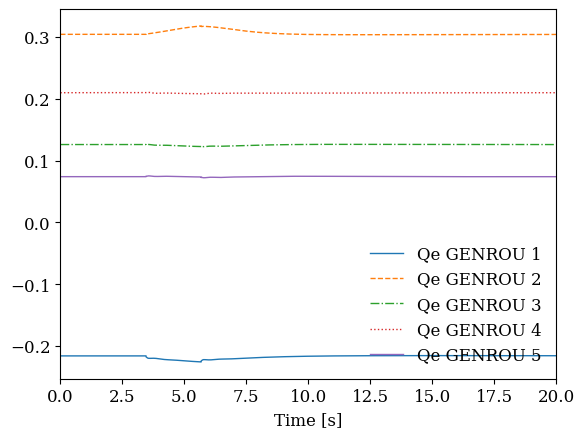

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [11]:
ss.TDS.plt.plot(ss.GENROU.Qe, latex=False)